# Demo Gaussian Generation

Illustrate the generation of a d-dimensional Gaussian image

## Description

The sequence below shows a technique to a d-dimensional Gaussian image,
understanding the difficulties in computing an equation with vector and
matrix notation.

## One dimensional case

The Gaussian function is a symmetric bell shaped function that is characterized by
two parameters: mean and variance. The one-dimensional Gaussian function at point
$x$ is given by the following equation, with mean $\mu$ and variance 
$\sigma^2$. The function is maximum at point $x=\mu$ and it falls by the
factor $e^{-\frac{1}{2}}$ (approx. 0.6) at point $x=\sigma$ away from the mean.

### Equation

$$    f(x) = \frac{1}{\sqrt{2 \pi} \sigma} exp\left[ -\frac{1}{2}  \frac{\left(x - \mu\right)^2}{\sigma^2}  \right] $$

As this function is scalar, it is possible to compute this function on N samples represented
as a N x 1 vector ${\mathbf x} = [x_0, x_1, x_2, \ldots x_{N-1}]^\mathrm{T}$:

$$    f({\mathbf x}) = \frac{1}{\sqrt{2 \pi} \sigma} exp\left[ -\frac{1}{2}  \frac{\left({\mathbf x} - \mu\right)^2}{\sigma^2}  \right]$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

In [7]:
# First case: unidimensional
# x: single value (single sample) or a row of values (many samples)
# mu and sigma are scalar
def fun1(x, mu, sigma):
    return (1./(np.sqrt(2 * np.pi) * sigma)) * np.exp(-1./2 * ((x-mu)/ sigma)**2)

In [22]:
print('Computing the Gaussian function at a single point')  
ex1 = "fun1( 10, 10, 5)"
print(ex1,"=>", eval(ex1))

ex2 = "fun1( 15, 10, 5)"
print(ex2,"=>", eval(ex2))

Computing the Gaussian function at a single point
fun1( 10, 10, 5) => 0.0797884560803
fun1( 15, 10, 5) => 0.0483941449038


### Computing the Gaussian function at many points, using the same code


Computing the Gaussian function at many points, using the same code
fun1( np.array([[10,15,20]]).T, 10, 5) =>
 [[ 0.07978846]
 [ 0.04839414]
 [ 0.01079819]]


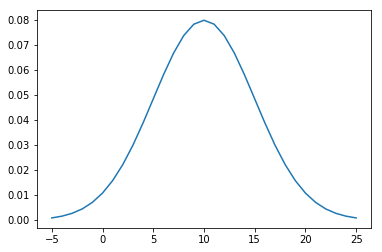

In [25]:
ex3 = "fun1( np.array([[10,15,20]]).T, 10, 5)"
print(ex3,"=>\n", eval(ex3))

x = np.arange(-5,26).reshape(-1,1)
y = fun1(x, 10, 5)
plt.plot(x,y)

## d-dimensional Case

If a sample point is a vector of dimension d: ${\mathbf x} = [x_0, x_1, \ldots x_{d-1}]^T$, 
the d-dimensional Gaussian function is characterized by the mean 
vector: ${\mathbf \mu} = [\mu_0, \mu_1, \ldots \mu_{d-1}]^T$ and the symmetric square 
covariance matrix:

$$     \Sigma_d = \left( 
                \begin{array}{cccc} 
                  \sigma_0^2           & \sigma_0\sigma_1     & \ldots & \sigma_0\sigma_{d-1} \\
                  \sigma_1\sigma_0     & \sigma_1^2           & \ldots & \sigma_1\sigma_{d-1} \\
                  \vdots               & \vdots               & \vdots & \vdots \\
                  \sigma_{d-1}\sigma_0 & \sigma_{d-1}\sigma_1 & \ldots & \sigma_{d-1}^2
                \end{array}
                \right) $$

### Equation

$$    f({\mathbf x}) = \frac{1}{(2 \pi)^{d/2}|\Sigma|^{1/2}} exp\left[ -\frac{1}{2}\left({\mathbf x} - {\mathbf \mu} \right)^\mathrm{T}\Sigma^{-1}\left({\mathbf x} - {\mathbf \mu} \right)\right] $$

In [19]:
# Second case: d-dimensional, single sample
# x: single column vector (single sample with d characteristics)
# mu: column vector, 1 x d
# sigma: covariance matrix, square and symmetric, d x d
def funn(X, MU, COV):
    d = len(X)
    Xc = X - MU
    aux = np.linalg.inv(COV).dot(Xc)
    k = 1. * (Xc.T).dot(aux)
    return (1./((2 * np.pi)**(d/2.) * np.sqrt(np.linalg.det(COV)))) * np.exp(-1./2 * k)

In [20]:
print('\ncomputing the Gaussian function at a single 3-D sample')
X1 = np.array([[10],
               [5],
               [3]])
MU = X1
COV = np.array([[10*10, 0,   0],
                [0,     5*5, 0],
                [0,     0,   3*3]])
print('X1=',X1)
print('MU=',MU)
print('COV=',COV)
ex4 = "funn( X1, MU, COV)"
print(ex4,"=>", eval(ex4))

print('\nComputing the Gaussian function at two 3-D samples')
print('\nNote that it does not work')
X2 = 1. * X1/2
X = np.hstack([X1,X2])
print('X=',X)
ex5 = "funn( X, MU, COV)"
print(ex5,"=>", eval(ex5))


computing the Gaussian function at a single 3-D sample
X1= [[10]
 [ 5]
 [ 3]]
MU= [[10]
 [ 5]
 [ 3]]
COV= [[100   0   0]
 [  0  25   0]
 [  0   0   9]]
funn( X1, MU, COV) => [[ 0.00042329]]

Computing the Gaussian function at two 3-D samples

Note that it does not work
X= [[ 10.    5. ]
 [  5.    2.5]
 [  3.    1.5]]
funn( X, MU, COV) => [[ 0.00042329  0.00042329]
 [ 0.00042329  0.00029092]]


Computing d-dimensional Gaussian function on n sample points directly
---------------------------------------------------------------------

The exponent part of the d-dimensional equation is an inner product with the covariance
matrix in the center. When the data is arranged as a block matrix of n d-dimensional points,
we need to apply the inner product to each d-dimensional point. This is equivalent to
use only the diagonal results of the matrix product. More information can be seen at
`http://en.wikipedia.org/wiki/Matrix_multiplication Matrix Mulplication` wikipedia page.

.. equation:: latex
    :align: left

    {\mathbf X_{n \times d}} = [ {\mathbf x_0}, {\mathbf x_1}, \ldots {\mathbf x_{n-1}} ]
    
.. equation:: latex
    :align: left

    f({\mathbf X}) = \frac{1}{(2 \pi)^{d/2}|\Sigma|^{1/2}} exp\left[ diag ( -\frac{1}{2} \left({\mathbf x} - {\mathbf \mu} \right)^\mathrm{T}\Sigma^{-1}\left({\mathbf x} - {\mathbf \mu} \right) ) \right]

.. code:: python

    # Third case: m n-dimensional computing
    # X: n column vectors (n samples with d characteristics)
    # MU: column vector, 1 x M
    # COV: covariance matrix, square and symmetric, d x d
    def funm(X, MU, COV):
      d = len(MU)
      Xc = X - MU
      k = 1. * diagonal(dot(transpose(Xc), dot(inv(COV), Xc)))
      return (1./((2 * pi)**(d/2.) * sqrt(det(COV)))) * exp(-1./2 * k)
    
    print '\ncomputing the Gaussian function on two 3-D samples'
    X = array([[10, 5],
               [ 5, 2.5],
               [ 3, 1.5]])
    MU = transpose(array([[10, 5, 3]]))
    COV = array([[10*10, 0,   0],
                 [0,     5*5, 0],
                 [0,     0,   3*3]])
    print 'X=',X
    print 'MU=',MU
    print 'COV=',COV
    ex6 = "funm( X, MU, COV)"
    print ex6,"=>", eval(ex6)

.. code:: python
    :show_code:   yes
    :show_output: yes
    :show_images: yes

    from ia636 import ianormalize
    # Forth case: optimized m n-dimensional computing
    # X: n column vectors (n samples with d characteristics)
    # MU: column vector, 1 x M
    # COV: covariance matrix, square and symmetric, d x d
    def funm1(X, MU, COV):
      d = len(MU)
      Xc = X - MU
      k = 1. * Xc * dot(inv(COV), Xc)
      k = sum(k,axis=0) #the sum is only applied to the rows
      return (1./((2 * pi)**(d/2.) * sqrt(det(COV)))) * exp(-1./2 * k)
    
    print '\ncomputing the Gaussian function on two 3-D samples'
    X = array([[10, 5],
               [ 5, 2.5],
               [ 3, 1.5]])
    MU = transpose(array([[10, 5, 3]]))
    COV = array([[10*10, 0,   0],
                 [0,     5*5, 0],
                 [0,     0,   3*3]])
    print 'X=',X
    print 'MU=',MU
    print 'COV=',COV
    ex6 = "funm1( X, MU, COV)"
    print ex6,"=>", eval(ex6)

    i,j = indices((50,100))
    x = vstack((ravel(i),ravel(j)))
    MU = transpose(array([[25, 40]]))
    COV = array([[15*15, 0, ],
                 [0,     10*10]])
    y = funm1(x, MU, COV).reshape((50,100))
    adshow(ianormalize(y).astype(uint8))

Suggested Exercises
-------------------

1. Compute the 2 dimensional Gaussian image using the equation of a decomposible Gaussian
   below. You can use the meshgrid style programming where the image (coordinates and
   value) can be stored in an image like format.

.. equation:: latex

    f(i,j) = \frac{1}{2 \pi \sigma_i \sigma_j} 
            exp ( -\frac{1}{2} \left( \frac{\left(i - \mu_i\right)^2}{\sigma_i^2} +
            \frac{\left(j - \mu_j\right)^2}{\sigma_j^2} \right) )
 
2. Show that the previous 2 dimensional Gaussian image can be composed as an outer product 
   of two one dimensional signals

3. Find the equation of a 2 dimensional Gaussian image when the covariance matrix is 
   of the form:

.. equation:: latex

   Cov(i,j) = \left(
               \begin{array}{cc}
                \sigma_i^2        & \sigma_i \sigma_j \\
                \sigma_i \sigma_j & \sigma_j^2
               \end{array}
              \right)